=== DATA OVERVIEW ===
Antal rader: 80
Antal kolumner: 9

Kolumner: ['person', 'lang', 'z1000t', 'z0t', 'z1000mem', 'z1000rel', 'm1000rel', 'whours', 'caps']

Förhandsgranskning:


,person,lang,z1000t,z0t,z1000mem,z1000rel,m1000rel,whours,caps
Unnamed: 0,,,,,,,,,
0,s018,c,0.017,0.017,22432,98.10,96.8,16.1,NaN
1,s030,c,0.617,0.033,16968,76.47,92.1,4.0,NaN
2,s036,c,20.900,0.000,11440,0.00,89.5,8.2,NaN
3,s066,c,0.750,0.467,2952,98.48,100.0,7.3,NaN
4,s078,c,0.050,0.050,22496,99.24,98.4,10.9,NaN



=== DESCRIPTIVE STATISTICS (numerical) ===


,z1000t,z0t,z1000mem,z1000rel,m1000rel,whours
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,8.161075,0.309600,29879.600000,92.577125,74.467500,8.52950
std,25.794414,0.361484,20653.096577,24.579252,40.341441,10.15679
min,0.017000,0.000000,2952.000000,0.000000,0.000000,0.00000
25%,0.237500,0.067000,17230.000000,99.240000,10.200000,3.12750
50%,0.617000,0.167000,22552.000000,100.000000,98.400000,6.17000
75%,1.770750,0.454250,40434.000000,100.000000,100.000000,9.72500
max,202.800000,2.017000,91120.000000,100.000000,100.000000,63.20000



=== DESCRIPTIVE STATISTICS (categorical) ===


,person,lang,caps
count,80,80,38
unique,80,7,5
top,s018,java,10-25%
freq,1,24,15



=== DISTRIBUTIONS OF NUMERICAL VARIABLES ===


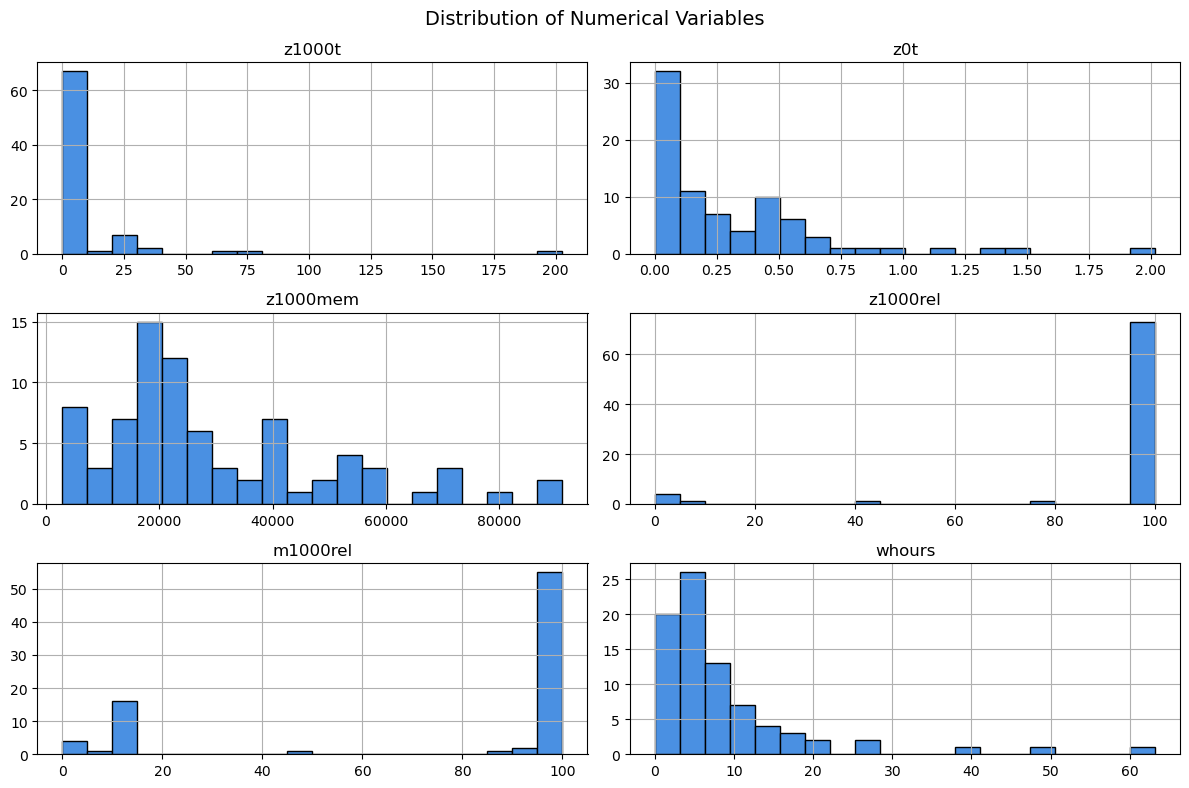

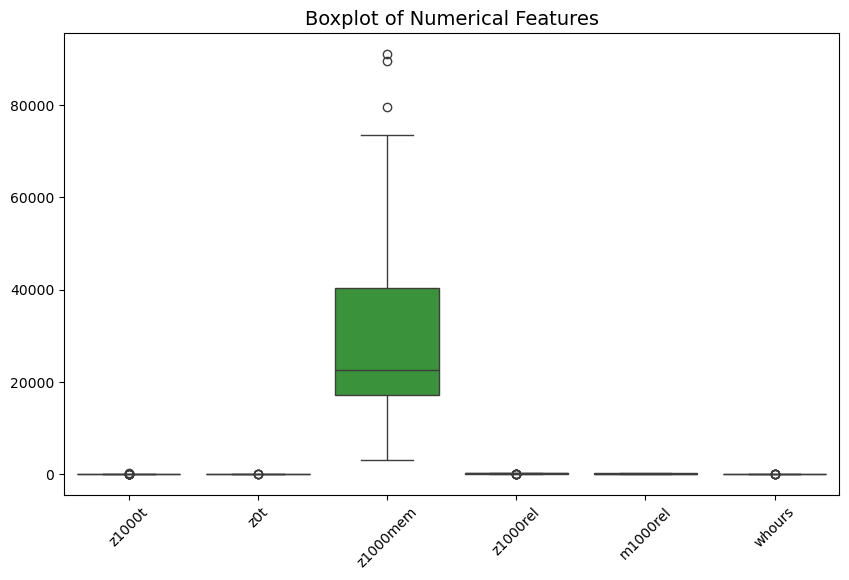

/tmp/ipykernel_107/1355232628.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


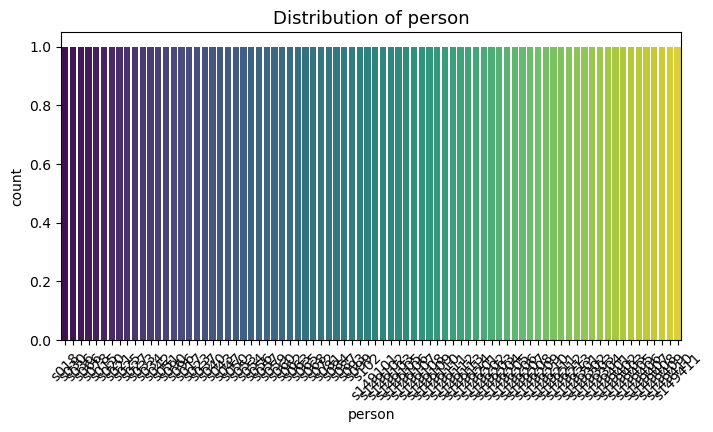

/tmp/ipykernel_107/1355232628.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


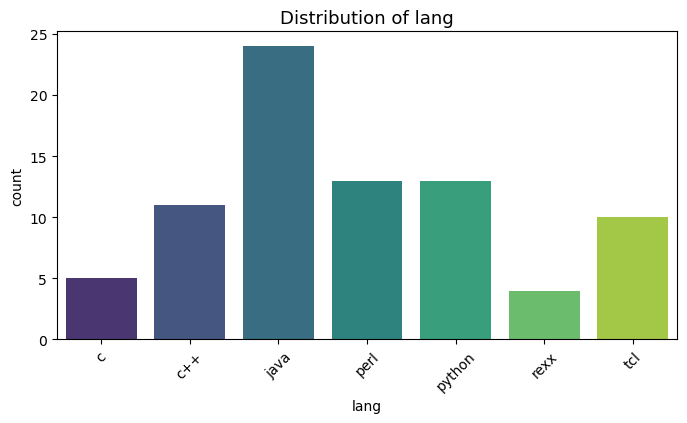

/tmp/ipykernel_107/1355232628.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


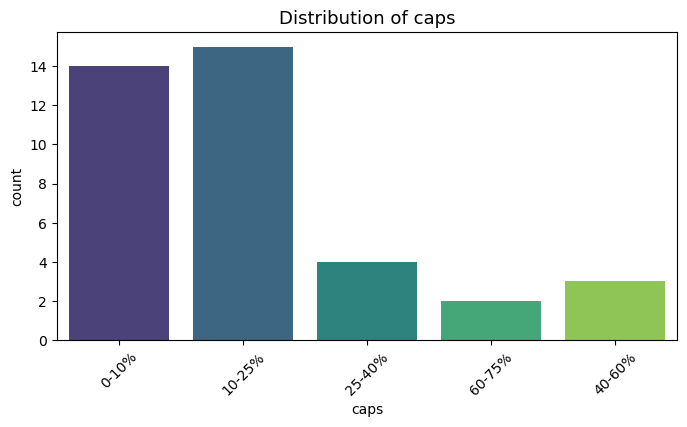

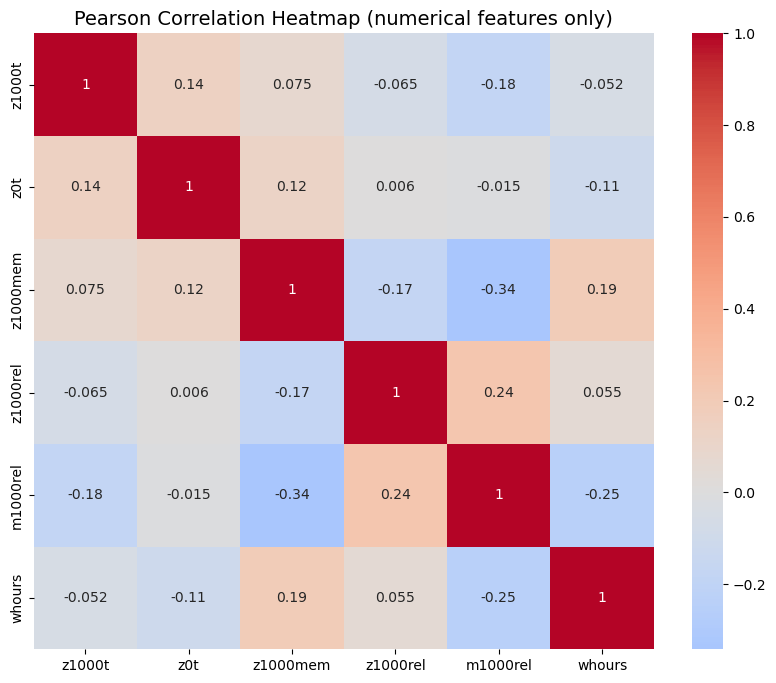

/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


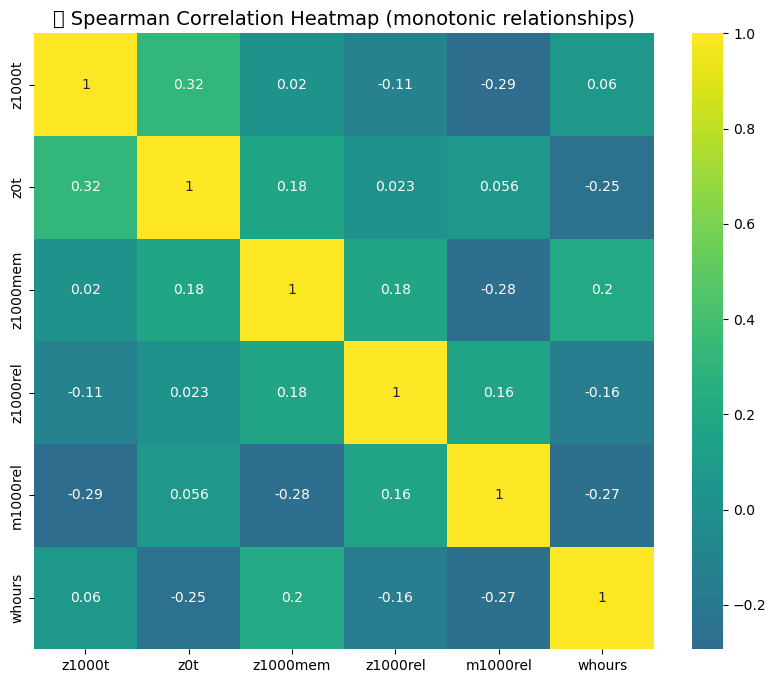


=== SKEWNESS ===
z1000t      5.968264
z0t         2.286949
z1000mem    1.140270
z1000rel   -3.383277
m1000rel   -1.057224
whours      3.315726
dtype: float64

=== CATEGORY BALANCE ===

Kolumn: person
person
s018       1.25
s030       1.25
s149206    1.25
s149205    1.25
s149204    1.25
           ... 
s056       1.25
s054       1.25
s053       1.25
s050       1.25
s149411    1.25
Name: proportion, Length: 80, dtype: float64

Kolumn: lang
lang
java      30.00
perl      16.25
python    16.25
c++       13.75
tcl       12.50
c          6.25
rexx       5.00
Name: proportion, dtype: float64

Kolumn: caps
caps
10-25%    39.473684
0-10%     36.842105
25-40%    10.526316
40-60%     7.894737
60-75%     5.263158
Name: proportion, dtype: float64

=== INTERPRETATION GUIDE ===
1️⃣ Descriptive statistics visar central tendens och spridning.
2️⃣ Histogrammen visar om variablerna är normalfördelade eller snedfördelade.
3️⃣ Boxplots avslöjar eventuella outliers.
4️⃣ Countplots visar om någon kategori (

In [ ]:
# 📊 --- Exploratory Data Analysis (EDA) ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------  Läs in datan --------------------
df = pd.read_csv("assignment_3_dataset_clean.csv", index_col=0)

print("=== DATA OVERVIEW ===")
print(f"Antal rader: {len(df)}")
print(f"Antal kolumner: {len(df.columns)}")
print("\nKolumner:", list(df.columns))
print("\nFörhandsgranskning:")
display(df.head())

# --------------------  Descriptive Statistics --------------------
print("\n=== DESCRIPTIVE STATISTICS (numerical) ===")
display(df.describe())

print("\n=== DESCRIPTIVE STATISTICS (categorical) ===")
display(df.describe(include='object'))

# --------------------  Distributioner --------------------
print("\n=== DISTRIBUTIONS OF NUMERICAL VARIABLES ===")
df.hist(figsize=(12, 8), bins=20, color="#4a90e2", edgecolor="black")
plt.suptitle("Distribution of Numerical Variables", fontsize=14)
plt.tight_layout()
plt.show()

# --------------------  Boxplots för outliers --------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=["float64", "int64"]))
plt.title("Boxplot of Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# --------------------  Correlation Heatmap Pearson --------------------
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True, method="pearson")
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Pearson Correlation Heatmap (numerical features only)", fontsize=14)
plt.show()

# --- Spearman correlation ---
plt.figure(figsize=(10, 8))
corr_spearman = df.corr(numeric_only=True, method="spearman")
sns.heatmap(corr_spearman, annot=True, cmap="viridis", center=0)
plt.title("📊 Spearman Correlation Heatmap (monotonic relationships)", fontsize=14)
plt.show()

# --------------------  Skewness (snedhet) --------------------
print("\n=== SKEWNESS ===")
print(df.skew(numeric_only=True))

# --------------------  Bias / imbalance check --------------------
print("\n=== CATEGORY BALANCE ===")
for col in cat_cols:
    print(f"\nKolumn: {col}")
    print(df[col].value_counts(normalize=True) * 100)

# --------------------  Sammanfattande kommentar --------------------
print("""
=== INTERPRETATION GUIDE ===
1️⃣ Descriptive statistics visar central tendens och spridning.
2️⃣ Histogrammen visar om variablerna är normalfördelade eller snedfördelade.
3️⃣ Boxplots avslöjar eventuella outliers.
4️⃣ Countplots visar om någon kategori (t.ex. 'lang') dominerar, vilket kan innebära bias.
5️⃣ Korrelationer nära 0 tyder på oberoende variabler, medan ±1 indikerar starka samband.
6️⃣ Skewness > 1 eller < -1 innebär kraftig snedfördelning.
""")
